In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
digits = load_digits()

X = digits.data
y = digits.target

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1797, 64)
y shape: (1797,)


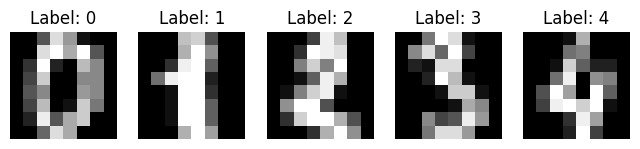

In [3]:
plt.figure(figsize=(8,4))

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')

plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with K=3:", accuracy)

Accuracy with K=3: 0.9694444444444444


In [7]:
k_values = [3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc}")

K=3, Accuracy=0.9694444444444444
K=5, Accuracy=0.975
K=7, Accuracy=0.9722222222222222
K=9, Accuracy=0.9722222222222222


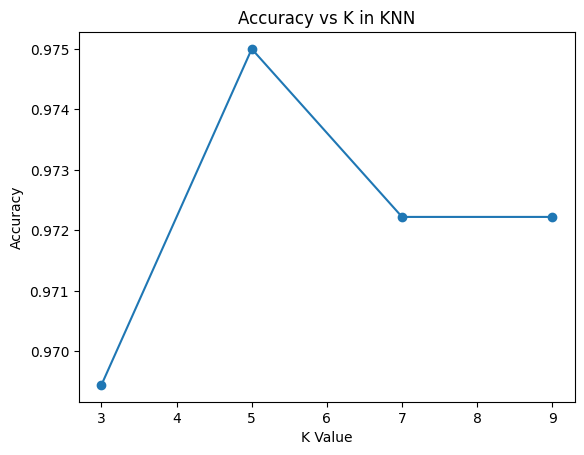

In [8]:
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K in KNN")
plt.show()

In [9]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  1 33  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  1  0 32  0  1]
 [ 0  2  0  0  0  0  0  0 28  0]
 [ 0  0  0  1  1  1  0  0  0 37]]


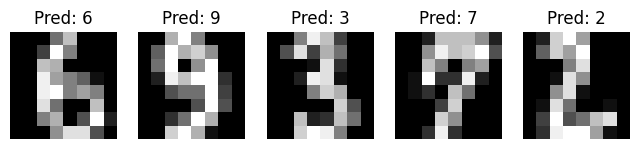

In [10]:
plt.figure(figsize=(8,4))

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i].reshape(8,8), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}")
    plt.axis('off')

plt.show()